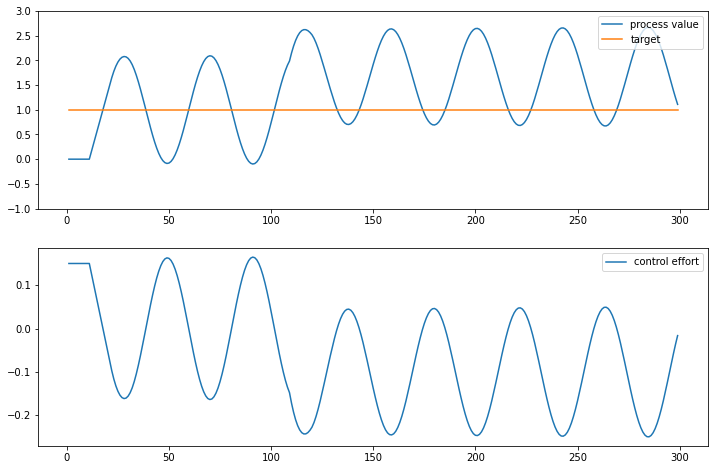

In [4]:
from simple_pid import PID
# import random noise to simulate a noisy sensor
from random import gauss



class ControlledSystem:
    def __init__(self, x0=0, dt=0.1):
        self.x = x0
        self.dt = dt
        self.time = 0
        self.add_noise = False
        self.delay = 10 
        self.history = [self.x]*self.delay

    def update(self, u):
        self.time += self.dt    

        if self.time < 100:
            self.x += u * self.dt
        else: 
            self.x += u * self.dt + 0.1
        
        if self.add_noise:
            self.x += gauss(0, 1)
        
        self.history.append(self.x)
        
        return self.history.pop(0)


dt = 1
target = 1
x0 = 0
# P only stable
pid = PID(.15/dt, 0, 0, setpoint=target)

# ultimate gain is .15 (Ku)
# ultimate period is 40 Tu
Ku = .15 / dt
Tu = 40 * dt
#pid = PID(Ku*0.6, 1.2*Ku/Tu, 0.075*Ku*Tu , setpoint=target) # classic PID (weights from https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method)

controlled_system = ControlledSystem(x0=x0, dt=dt)


time_history = []
v_history = []
control_history = []

# Assume we have a system we want to control in controlled_system
v = controlled_system.update(0)

while controlled_system.time < 300:
    # Compute new output from the PID according to the systems current value
    control = pid(v, dt)
    #print(time, v, control)
    
    # store data for plotting
    time_history.append(controlled_system.time)
    control_history.append(control)
    v_history.append(v)
    
    # Feed the PID output to the system and get its current value
    v = controlled_system.update(control)
    
    
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time_history, v_history, label='process value')
plt.plot(time_history, [target]*len(time_history), label='target')
# limit the y axis to make it easier to see what's happening
plt.ylim(min((x0-1,target-1,0)), max(x0+2,target+2,0))
plt.legend(loc='upper right')
plt.subplot(2, 1, 2)
plt.plot(time_history, control_history, label='control effort')
plt.legend(loc='upper right')

plt.show()